In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mtalbert.head()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
0,2018-07-07 11:15:00,37.364,10.4,0.0
1,2018-07-07 11:30:00,37.594,10.4,0.0
2,2018-07-07 11:45:00,37.590,10.4,0.0
3,2018-07-07 12:00:00,37.587,10.5,0.0
4,2018-07-07 12:15:00,37.584,10.5,0.0


In [3]:
mtalbert.dtypes

Timestamp (UTC+12:00)    datetime64[ns]
SoilMoisture(%)                 float64
SoilTemp(c)                     float64
Rain(mm)                        float64
dtype: object

#  Seasonal for soil moisture, soil temperature, and rainfall
- Summer: December to February
- Autumn: March to May
- Winter: June to August
- Spring: September to November

In [4]:
mtalbert_seasonal = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mtalbert_seasonal.head()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]: 
        return 'Autumn'
    elif month in [6, 7, 8]: 
        return 'Winter'
    else:
        return 'Spring'

In [5]:
mtalbert_seasonal['Year'] = mtalbert_seasonal['Timestamp (UTC+12:00)'].dt.year
mtalbert_seasonal['Month'] = mtalbert_seasonal['Timestamp (UTC+12:00)'].dt.month
mtalbert_seasonal['Season'] = mtalbert_seasonal['Month'].apply(get_season)
mtalbert_seasonal.head()


,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm),Year,Month,Season
0,2018-07-07 11:15:00,37.364,10.4,0.0,2018,7,Winter
1,2018-07-07 11:30:00,37.594,10.4,0.0,2018,7,Winter
2,2018-07-07 11:45:00,37.590,10.4,0.0,2018,7,Winter
3,2018-07-07 12:00:00,37.587,10.5,0.0,2018,7,Winter
4,2018-07-07 12:15:00,37.584,10.5,0.0,2018,7,Winter


In [6]:
seasonal_means = mtalbert_seasonal.groupby(['Year', 'Season']).agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'sum'
}).reset_index()

print(seasonal_means)


    Year  Season  SoilMoisture(%)  SoilTemp(c)  Rain(mm)
0   2018  Winter        40.728629    11.620830     74.16
1   2019  Autumn        42.008843    15.371712     33.08
2   2019  Spring        45.797121    16.380491    315.61
3   2019  Summer        38.699315    21.174496     49.84
4   2019  Winter        46.115090    12.528551    399.72
5   2020  Autumn        35.679585    18.023177    194.51
6   2020  Spring        41.199940    16.879464    234.86
7   2020  Summer        36.932246    21.266529     56.81
8   2020  Winter        43.192310    13.326608    443.15
9   2021  Autumn        38.477429    18.165438    189.82
10  2021  Spring        46.117471    17.074201    349.89
11  2021  Summer        38.624021    21.714390    252.08
12  2021  Winter        44.535087    12.881941    335.82
13  2022  Autumn        37.122928    18.867226    232.19
14  2022  Spring        47.113186    17.126988    429.40
15  2022  Summer        40.173106    22.375220    176.00
16  2022  Winter        47.7797

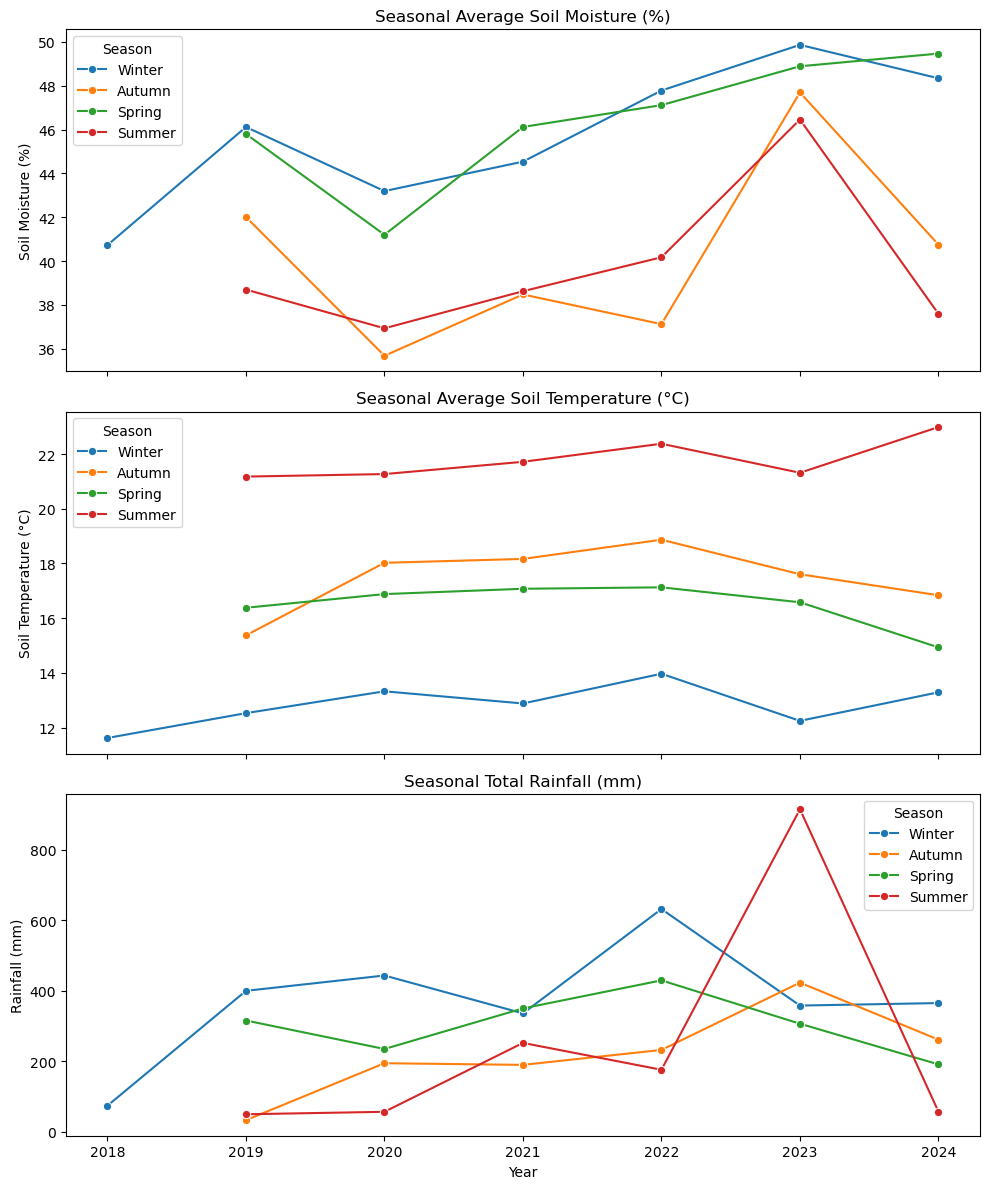

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot SoilMoisture(%)
sns.lineplot(ax=axes[0], data=seasonal_means, x='Year', y='SoilMoisture(%)', hue='Season', marker='o')
axes[0].set_title('Seasonal Average Soil Moisture (%)')
axes[0].set_ylabel('Soil Moisture (%)')

# Plot SoilTemp(c)
sns.lineplot(ax=axes[1], data=seasonal_means, x='Year', y='SoilTemp(c)', hue='Season', marker='o')
axes[1].set_title('Seasonal Average Soil Temperature (°C)')
axes[1].set_ylabel('Soil Temperature (°C)')

# Plot Rain(mm)
sns.lineplot(ax=axes[2], data=seasonal_means, x='Year', y='Rain(mm)', hue='Season', marker='o')
axes[2].set_title('Seasonal Total Rainfall (mm)')
axes[2].set_ylabel('Rainfall (mm)')
axes[2].set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()

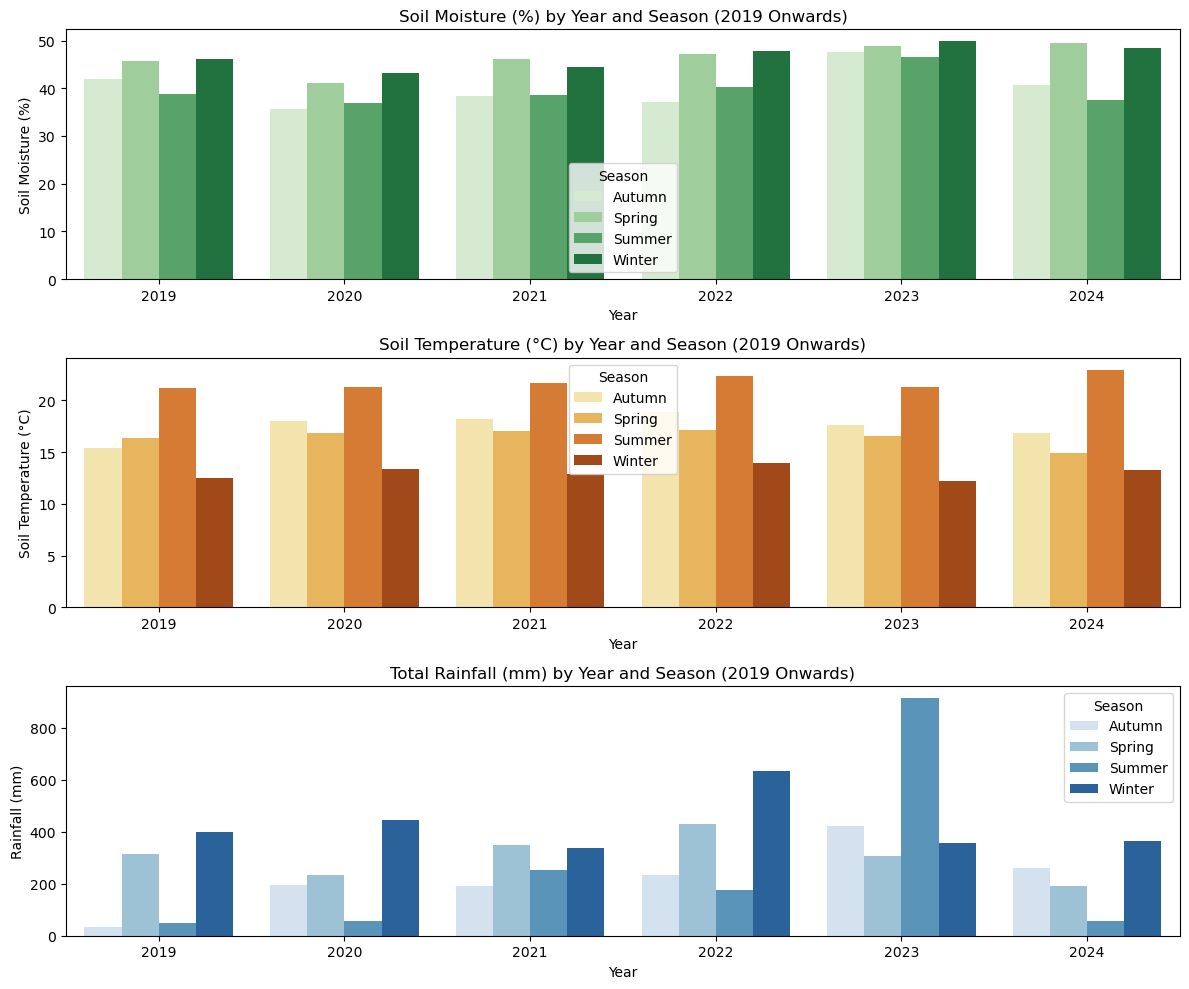

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

seasonal_means_filtered = seasonal_means[seasonal_means['Year'] >= 2019]

# Set up the figure and axes for 3 variables
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Bar plot for Soil Moisture
sns.barplot(ax=axes[0], data=seasonal_means_filtered, x='Year', y='SoilMoisture(%)', hue='Season', palette='Greens')
axes[0].set_title('Soil Moisture (%) by Year and Season (2019 Onwards)')
axes[0].set_ylabel('Soil Moisture (%)')

# Bar plot for Soil Temperature
sns.barplot(ax=axes[1], data=seasonal_means_filtered, x='Year', y='SoilTemp(c)', hue='Season', palette='YlOrBr')
axes[1].set_title('Soil Temperature (°C) by Year and Season (2019 Onwards)')
axes[1].set_ylabel('Soil Temperature (°C)')

# Bar plot for Rainfall
sns.barplot(ax=axes[2], data=seasonal_means_filtered, x='Year', y='Rain(mm)', hue='Season', palette='Blues')
axes[2].set_title('Total Rainfall (mm) by Year and Season (2019 Onwards)')
axes[2].set_ylabel('Rainfall (mm)')
axes[2].set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()


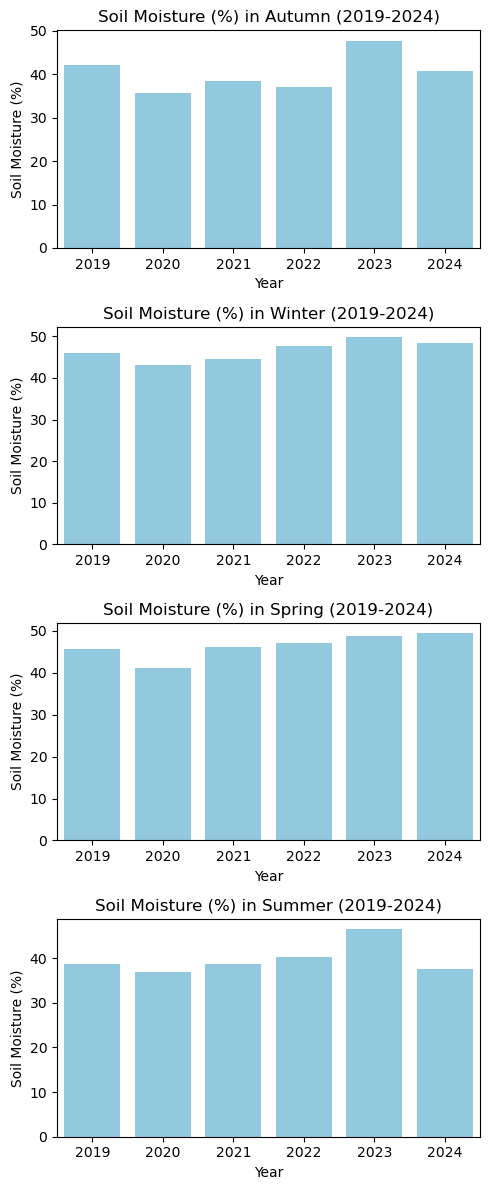

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of seasons
seasons = ['Autumn', 'Winter', 'Spring', 'Summer']

# Set up the figure with subplots for each season
fig, axes = plt.subplots(4, 1, figsize=(5, 12))

# Iterate through each season and plot the values over the years
for i, season in enumerate(seasons):
    # Filter data for the current season
    season_data = seasonal_means_filtered[seasonal_means_filtered['Season'] == season]
    
    # Plot for Soil Moisture
    sns.barplot(ax=axes[i], data=season_data, x='Year', y='SoilMoisture(%)', color='skyblue')
    axes[i].set_title(f'Soil Moisture (%) in {season} (2019-2024)')
    axes[i].set_ylabel('Soil Moisture (%)')
    axes[i].set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()

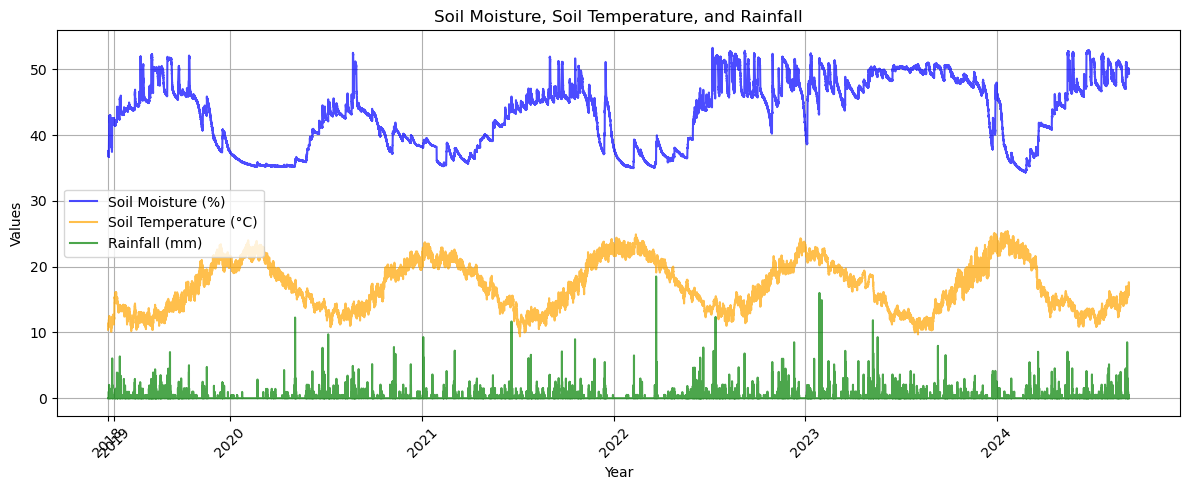

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
data_to_plot = mtalbert_seasonal[['SoilMoisture(%)', 'SoilTemp(c)', 'Rain(mm)', 'Year']]


data_to_plot['SoilMoisture(%)'].plot(ax=ax, color='blue', label='Soil Moisture (%)', alpha=0.7)
mtalbert_seasonal['SoilTemp(c)'].plot(ax=ax, color='orange', label='Soil Temperature (°C)', alpha=0.7)
mtalbert_seasonal['Rain(mm)'].plot(ax=ax, color='green', label='Rainfall (mm)', alpha=0.7)

year_starts = mtalbert_seasonal.groupby('Year').head(1).index
years = mtalbert_seasonal['Year'].unique()  # Get unique years
ax.set_xticks(year_starts)  # Set x-ticks for each year
ax.set_xticklabels(years, rotation=45)  # Set the year labels

ax.set_xlabel('Year')
ax.set_ylabel('Values')
plt.title('Soil Moisture, Soil Temperature, and Rainfall')


ax.set_xlabel('Year')
ax.set_ylabel('Values')
plt.title('Soil Moisture, Soil Temperature, and Rainfall')

ax.legend()

plt.grid()
plt.tight_layout()
plt.show()


In [11]:
mtalbert_seasonal.describe()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm),Year,Month
count,186297,186297.000000,186297.000000,186297.000000,186297.000000,186297.000000
mean,2022-01-10 16:49:46.666451968,43.414601,17.087949,0.039051,2021.517276,6.639817
min,2018-07-07 11:15:00,34.323000,9.400000,0.000000,2018.000000,1.000000
25%,2020-09-10 14:15:00,38.452000,13.900000,0.000000,2020.000000,4.000000
50%,2022-01-08 18:15:00,44.160000,16.700000,0.000000,2022.000000,7.000000
75%,2023-05-11 19:15:00,47.533000,20.400000,0.000000,2023.000000,9.000000
max,2024-10-09 00:00:00,53.250000,25.400000,18.500000,2024.000000,12.000000
std,NaN,5.157681,3.675339,0.287241,1.591144,3.350818


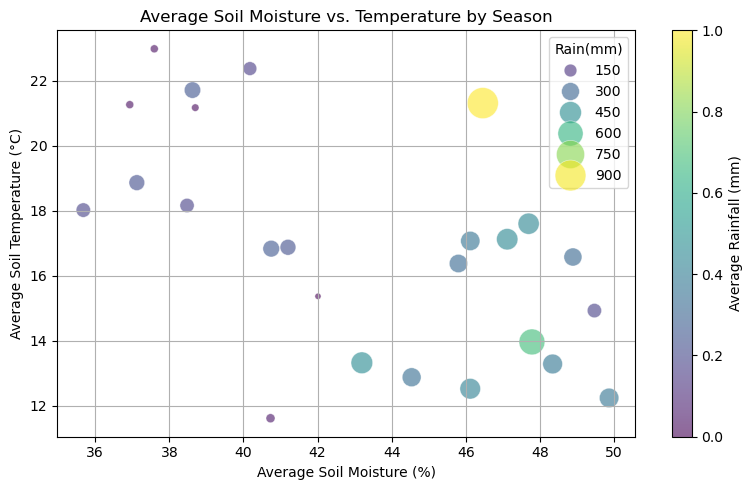

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    data=seasonal_means,
    x='SoilMoisture(%)',
    y='SoilTemp(c)',
    size='Rain(mm)',
    sizes=(20, 500),  # Set the range for the marker sizes
    hue='Rain(mm)',  # Color based on rainfall
    palette='viridis',
    alpha=0.6,
    edgecolor='w'
)

plt.colorbar(scatter.collections[0], label='Average Rainfall (mm)')

# Set labels and title
plt.xlabel('Average Soil Moisture (%)')
plt.ylabel('Average Soil Temperature (°C)')
plt.title('Average Soil Moisture vs. Temperature by Season')

plt.grid()
plt.tight_layout()
plt.show()

                 SoilMoisture(%)  SoilTemp(c)  Rain(mm)
SoilMoisture(%)         1.000000    -0.551792  0.068059
SoilTemp(c)            -0.551792     1.000000 -0.016443
Rain(mm)                0.068059    -0.016443  1.000000


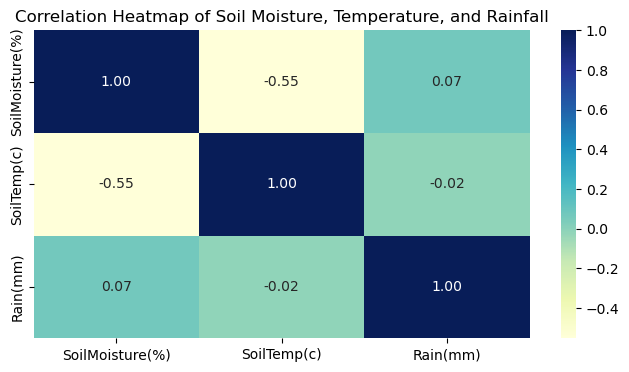

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = mtalbert_seasonal[['SoilMoisture(%)', 'SoilTemp(c)', 'Rain(mm)']]

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Soil Moisture, Temperature, and Rainfall')
plt.show()

Soil Moisture vs. Soil Temperature:
- As soil temperature increases, soil moisture tends to decrease, and vice versa.

Soil Moisture vs. Rainfall:
-  Although rain directly adds moisture to the soil, the overall effect on soil moisture levels can be influenced by other environmental factors, like soil type, land cover, and temperature.

Soil Temperature vs. Rainfall:
- Soil temperature and rainfall seem to be largely independent, as their correlation is close to zero. This is because we shall check the lag time in response

# 2. Stationarity
- use the Dickey Fuller test to check for stationarity in our data. This test will generate critical values and a p-value, which will allow us to accept or reject the null hypothesis that there is no stationarity. If we reject the null hypothesis, that means we accept the alternative, which states that there is stationarity.
- https://builtin.com/data-science/time-series-python


In [14]:
mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mtalbert.head()


,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
0,2018-07-07 11:15:00,37.364,10.4,0.0
1,2018-07-07 11:30:00,37.594,10.4,0.0
2,2018-07-07 11:45:00,37.590,10.4,0.0
3,2018-07-07 12:00:00,37.587,10.5,0.0
4,2018-07-07 12:15:00,37.584,10.5,0.0


In [15]:
mtalbert.set_index('Timestamp (UTC+12:00)', inplace=True)

gap_end_timestamp = '2019-05-26 05:15:00'
mtalbert_after_gap = mtalbert[mtalbert.index > gap_end_timestamp]


In [16]:
# Resample to hourly
# when resampling the data, soil moisture and soil temperature can be averaged (using .mean()), but rainfall should be accumulated (using .sum())

# Resample the data: mean for SoilMoisture and SoilTemp, sum for Rain as to take a total amount over a period rather than a continuous variable.
mtalbert_hourly = mtalbert_after_gap.resample('H').agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'sum'
})

mtalbert_hourly

C:\Users\Ying\AppData\Local\Temp\ipykernel_3556\801022599.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  mtalbert_hourly = mtalbert_after_gap.resample('H').agg({


,SoilMoisture(%),SoilTemp(c),Rain(mm)
Timestamp (UTC+12:00),,,
2019-05-26 05:00:00,41.59050,14.40000,0.0
2019-05-26 06:00:00,41.61575,14.40000,0.0
2019-05-26 07:00:00,41.61575,14.37500,0.0
2019-05-26 08:00:00,41.58650,14.30000,0.0
2019-05-26 09:00:00,41.60050,14.35000,0.0
...,...,...,...
2024-10-08 20:00:00,49.50350,17.53750,0.0
2024-10-08 21:00:00,49.40575,17.37225,0.0
2024-10-08 22:00:00,49.48150,17.30175,0.0


In [17]:

# to test the degree to which present values change with past values. 
# If there is no stationarity in the data set, a change in present values will not cause a significant change in past values.

# Shift the other variables
for days in [1, 3, 7, 14, 21, 28, 15, 45]:
    mtalbert_hourly[f'future_{days}_days_temp'] = mtalbert_hourly['SoilTemp(c)'].shift(-days * 24)
    mtalbert_hourly[f'future_{days}_days_rain'] = mtalbert_hourly['Rain(mm)'].shift(-days * 24)


# Calculate rolling mean and standard deviation for all variables
rolling_mean_moisture = mtalbert_hourly['SoilMoisture(%)'].rolling(window=7 * 24).mean().rename('rolling_mean_moisture')
rolling_std_moisture = mtalbert_hourly['SoilMoisture(%)'].rolling(window=7 * 24).std().rename('rolling_std_moisture')

rolling_mean_temp = mtalbert_hourly['SoilTemp(c)'].rolling(window=7 * 24).mean().rename('rolling_mean_temp')
rolling_std_temp = mtalbert_hourly['SoilTemp(c)'].rolling(window=7 * 24).std().rename('rolling_std_temp')

rolling_mean_rain = mtalbert_hourly['Rain(mm)'].rolling(window=1 * 24).sum().rename('rolling_mean_rain')
rolling_std_rain = mtalbert_hourly['Rain(mm)'].rolling(window=1 * 24).std().rename('rolling_std_rain')

# Combine rolling statistics into the DataFrame
mtalbert_hourly = mtalbert_hourly.join(rolling_mean_moisture).join(rolling_std_moisture)
mtalbert_hourly = mtalbert_hourly.join(rolling_mean_temp).join(rolling_std_temp)
mtalbert_hourly = mtalbert_hourly.join(rolling_mean_rain).join(rolling_std_rain)


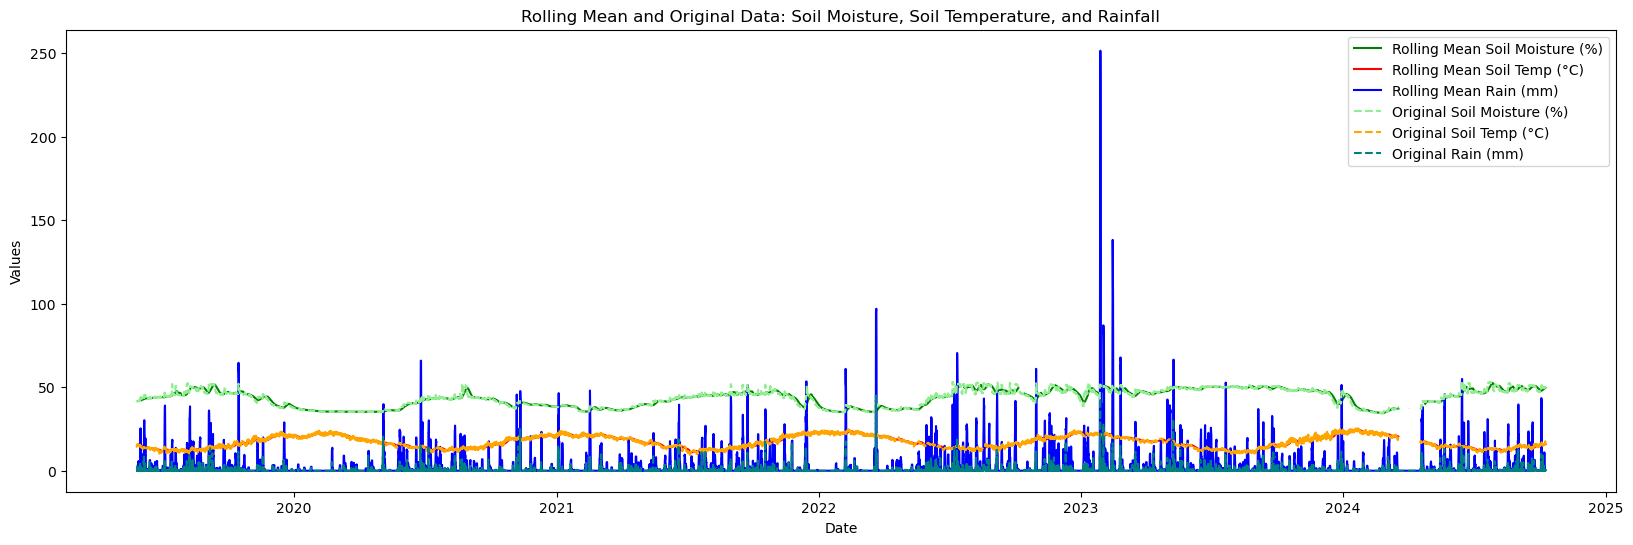

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Plot rolling mean
plt.plot(mtalbert_hourly.index, mtalbert_hourly['rolling_mean_moisture'], color="green", label="Rolling Mean Soil Moisture (%)")
plt.plot(mtalbert_hourly.index, mtalbert_hourly['rolling_mean_temp'], color="red", label="Rolling Mean Soil Temp (°C)")
plt.plot(mtalbert_hourly.index, mtalbert_hourly['rolling_mean_rain'], color="blue", label="Rolling Mean Rain (mm)")
plt.title("Rolling Mean of Soil Moisture, Soil Temperature, and Rainfall")
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Values")

# Plot original data (dashed lines)
plt.plot(mtalbert_hourly.index, mtalbert_hourly['SoilMoisture(%)'], color="lightgreen", linestyle="--", label="Original Soil Moisture (%)")
plt.plot(mtalbert_hourly.index, mtalbert_hourly['SoilTemp(c)'], color="orange", linestyle="--", label="Original Soil Temp (°C)")
plt.plot(mtalbert_hourly.index, mtalbert_hourly['Rain(mm)'], color="teal", linestyle="--", label="Original Rain (mm)")

plt.title("Rolling Mean and Original Data: Soil Moisture, Soil Temperature, and Rainfall")
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Values")
plt.show()


In [19]:
for days in [1, 3, 7, 14, 21, 28, 35, 45]:
    mtalbert[f'future_{days}_days_temp'] = mtalbert['SoilTemp(c)'].shift(-days * 96)
    mtalbert[f'future_{days}_days_rain'] = mtalbert['Rain(mm)'].shift(-days * 96)


# Calculate rolling mean and standard deviation for all variables
rolling_mean_moisture = mtalbert['SoilMoisture(%)'].rolling(window=7 * 96).mean()
rolling_std_moisture = mtalbert['SoilMoisture(%)'].rolling(window=7 * 96).std()

mtalbert['rolling_mean_moisture'] = rolling_mean_moisture
mtalbert['rolling_std_moisture'] = rolling_std_moisture

In [20]:
print(mtalbert.columns)


Index(['SoilMoisture(%)', 'SoilTemp(c)', 'Rain(mm)', 'future_1_days_temp',
       'future_1_days_rain', 'future_3_days_temp', 'future_3_days_rain',
       'future_7_days_temp', 'future_7_days_rain', 'future_14_days_temp',
       'future_14_days_rain', 'future_21_days_temp', 'future_21_days_rain',
       'future_28_days_temp', 'future_28_days_rain', 'future_35_days_temp',
       'future_35_days_rain', 'future_45_days_temp', 'future_45_days_rain',
       'rolling_mean_moisture', 'rolling_std_moisture'],
      dtype='object')


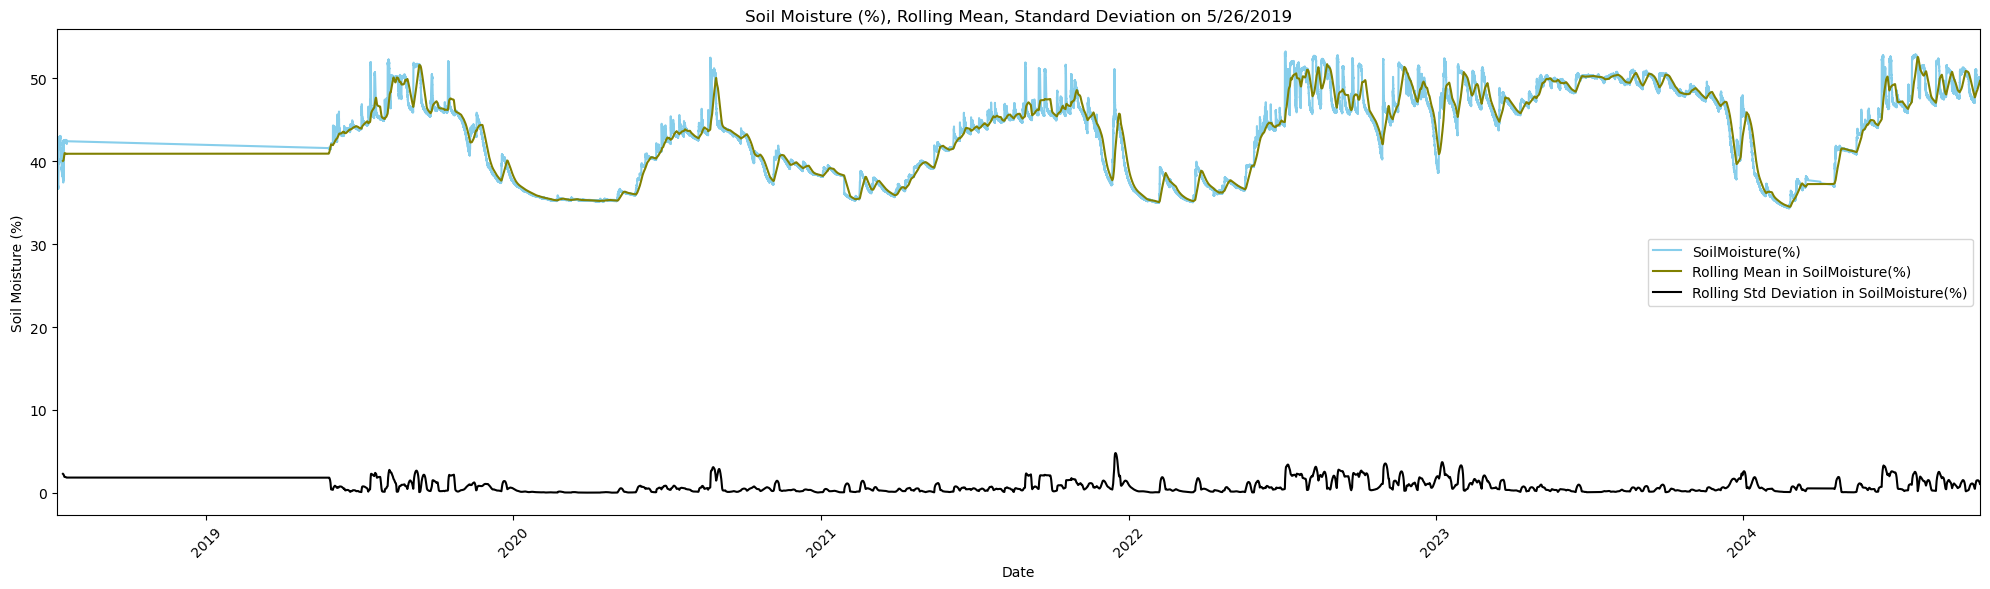

In [21]:
plt.figure(figsize=(20, 6))

plt.plot(mtalbert.index, mtalbert['SoilMoisture(%)'], color="skyblue", label="SoilMoisture(%)" )

if 'rolling_mean_moisture' in mtalbert.columns:
    plt.plot(mtalbert.index, mtalbert['rolling_mean_moisture'], color="olive", label="Rolling Mean in SoilMoisture(%)")
if 'rolling_std_moisture' in mtalbert.columns:
    plt.plot(mtalbert.index, mtalbert['rolling_std_moisture'], color="black", label="Rolling Std Deviation in SoilMoisture(%)")
plt.xlim([mtalbert.index.min(), mtalbert.index.max()])

plt.title("Soil Moisture (%), Rolling Mean, Standard Deviation on 5/26/2019")
plt.legend(loc="best")
plt.xlabel("Date")  
plt.ylabel("Soil Moisture (%)") 
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

the augmented Dickey-Fuller test from the statsmodels package.

-There are 96 intervals in a day (since 24 hours * 4 intervals per hour).
- For 45 days, need to consider ( 45 \times 96 = 4,320 ) intervals.
- For 30 days, need to consider ( 45 \times 96 = 2880 ) intervals.

In [22]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

result = adfuller(mtalbert_hourly['SoilMoisture(%)'].dropna())  # Drop NaN values
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Since -4.1703 is less than -3.4305 (1% level), -2.8616 (5% level), and -2.5668 (10% level), this reinforces that the time series is stationary.
# time series data for soil moisture is likely stationary, as evidenced by the negative ADF statistic and the low p-value.

ADF Statistic: -4.080089531152056
p-value: 0.0010445790119301306
Critical Values: {'1%': -3.4304913767196905, '5%': -2.861602485495186, '10%': -2.566803258981904}


# Time Response Analysis


In [23]:
# how much lag time
from statsmodels.tsa.stattools import ccf

lag_correlation = ccf(mtalbert['Rain(mm)'], mtalbert['SoilMoisture(%)'])


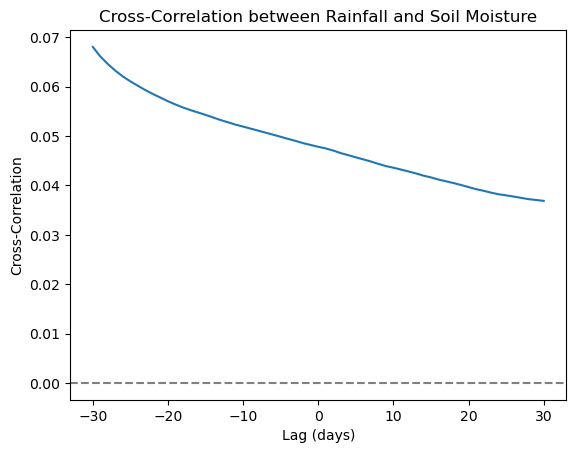

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create lag plot (up to 30 lags)
lags = np.arange(-30, 31)
plt.plot(lags, lag_correlation[:61])  # Plot correlation for lags from -30 to +30
plt.axhline(0, color='gray', linestyle='--')
plt.title('Cross-Correlation between Rainfall and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.show()

A downward slope in the cross-correlation plot indicates a negative correlation between the two time series. This means that as one series increases, the other tends to decrease.

Data Transformation


Feature Engineering: Scaling, Normalization and Standardization


Feature Selection


Handling Imbalanced Data


Encoding Categorical Features


Data Splitting